In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline
from IPython.display import display
plt.rc('font', family='Verdana')

## Введение
### Зачем нужно использовать машинное обучение?
### Задачи, которые можно решить с помощью машинного обучения

### Постановка задач и знакомство с данными

### Почему нужно использовать Python?

### Scikit-learn
#### Установка scikit-learn

#### Основные библиотеки и инструменты

##### Jupyter Notebook

##### NumPy

In [2]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


##### SciPy

In [3]:
from scipy import sparse

# Создаем 2D массив NumPy с единицами по главной диагонали и нулями в остальных ячейках
eye = np.eye(4)
print("массив NumPy:\n{}".format(eye))

массив NumPy:
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [4]:
# Преобразовываем массив NumPy в разреженную матрицу SciPy в формате CSR
# Сохраняем лишь ненулевые элементы
sparse_matrix = sparse.csr_matrix(eye)
print("\nразреженная матрица SciPy в формате CSR:\n{}".format(sparse_matrix))


разреженная матрица SciPy в формате CSR:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [5]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("формат COO:\n{}".format(eye_coo))

формат COO:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


##### matplotlib

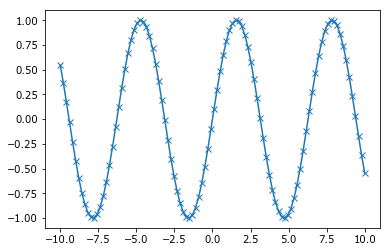

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Генерируем последовательность чисел от -10 до 10 с 100 шагами
x = np.linspace(-10, 10, 100)
# Создаем второй массив с помощью синуса
y = np.sin(x)
# Функция создает линейный график на основе двух массивов
plt.plot(x, y, marker="x") 

##### pandas

In [7]:
import pandas as pd

# создаем простой набор данных с характеристиками пользователей
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.display позволяет "красиво напечатать" датафреймы
# в Jupyter notebook
from IPython.display import display
display(data_pandas)


,Age,Location,Name
0,24,New York,John
1,13,Paris,Anna
2,53,Berlin,Peter
3,33,London,Linda


In [8]:
# Выбрать все строки, в которых значение столбца age больше 30
display(data_pandas[data_pandas.Age > 30])

,Age,Location,Name
2,53,Berlin,Peter
3,33,London,Linda


##### mglearn

#### Сравнение Python 2 и Python 3

#### Версии библиотек, используемые в этой книге

In [9]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("NumPy version: {}".format(np.__version__))

import scipy as sp
print("SciPy version: {}".format(sp.__version__))

import IPython
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

Python version: 3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
pandas version: 0.21.1
matplotlib version: 2.0.2
NumPy version: 1.12.1
SciPy version: 1.0.0
IPython version: 5.3.0
scikit-learn version: 0.19.1


### Первый пример: классификация сортов ириса
![sepal_petal](images/iris_petal_sepal.png)
#### Загружаем данные

In [10]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [11]:
print("Ключи iris_dataset: \n{}".format(iris_dataset.keys()))

Ключи iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [12]:
print(iris_dataset['DESCR'][:193] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


In [13]:
print("Названия ответов: {}".format(iris_dataset['target_names']))

Названия ответов: ['setosa' 'versicolor' 'virginica']


In [14]:
print("Названия признаков: \n{}".format(iris_dataset['feature_names']))

Названия признаков: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
print("Тип массива data: {}".format(type(iris_dataset['data'])))

Тип массива data: <class 'numpy.ndarray'>


In [16]:
print("Форма массива data: {}".format(iris_dataset['data'].shape))

Форма массива data: (150, 4)


In [17]:
print("Первые пять строк массива data:\n{}".format(iris_dataset['data'][:5]))

Первые пять строк массива data:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [18]:
print("Тип массива target: {}".format(type(iris_dataset['target'])))

Тип массива target: <class 'numpy.ndarray'>


In [19]:
print("Форма массива target: {}".format(iris_dataset['target'].shape))

Форма массива target: (150,)


In [20]:
print("Ответы:\n{}".format(iris_dataset['target']))

Ответы:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Метрики эффективности: обучающий и тестовый наборы

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [22]:
print("форма массива X_train: {}".format(X_train.shape))
print("форма массива y_train: {}".format(y_train.shape))

форма массива X_train: (112, 4)
форма массива y_train: (112,)


In [23]:
print("форма массива X_test: {}".format(X_test.shape))
print("форма массива y_test: {}".format(y_test.shape))

форма массива X_test: (38, 4)
форма массива y_test: (38,)


#### Сперва посмотрите на Ваши данные

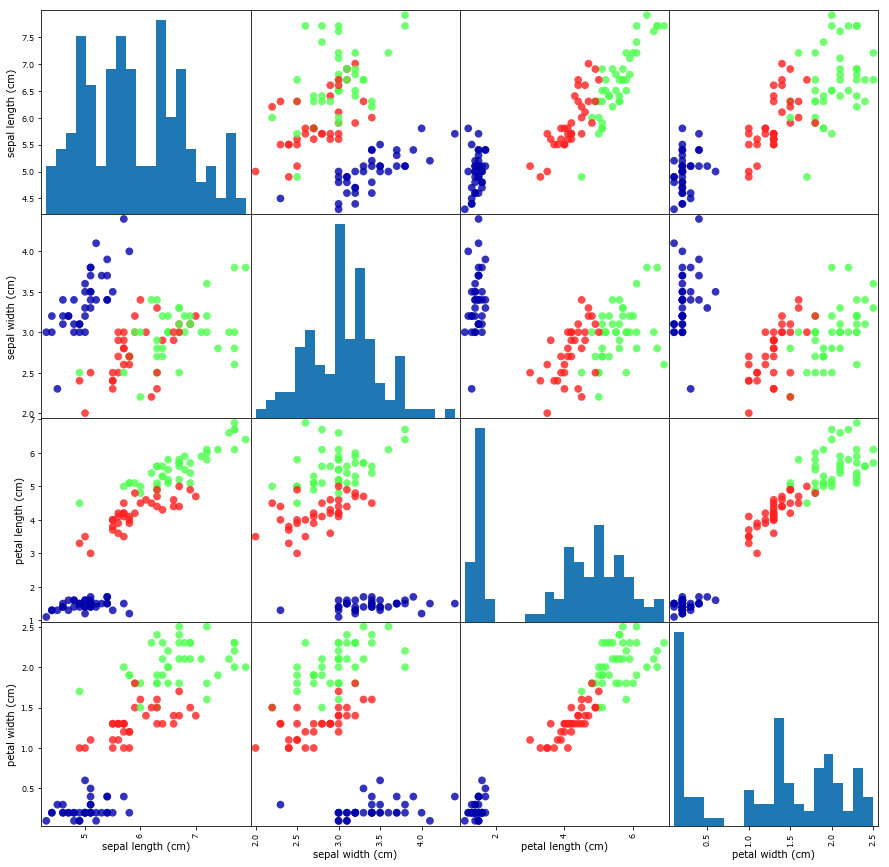

In [24]:
# создаем dataframe из данных в массиве X_train
# маркируем столбцы, используя строки в iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# создаем матрицу рассеяния из dataframe, цвет точек задаем с помощью y_train
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3) 

#### Построение вашей первой модели: метод k ближайших соседей

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### Получение прогнозов

In [27]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("форма массива X_new: {}".format(X_new.shape))

форма массива X_new: (1, 4)


In [28]:
prediction = knn.predict(X_new)
print("Прогноз: {}".format(prediction))
print("Спрогнозированная метка: {}".format(
       iris_dataset['target_names'][prediction]))

Прогноз: [0]
Спрогнозированная метка: ['setosa']


#### Оценка модели

In [29]:
y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора:\n {}".format(y_pred))

Прогнозы для тестового набора:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [30]:
print("Правильность на тестовом наборе: {:.2f}".format(np.mean(y_pred == y_test)))

Правильность на тестовом наборе: 0.97


In [31]:
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе: 0.97


#### Выводы и перспективы

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе: 0.97
